### **Business Problem**





**Customer-Centric Business Problem: Real Estate Price Prediction Web Application**

A real estate technology company is committed to providing homebuyers and sellers with a user-friendly web application that empowers them to make informed decisions when buying or selling properties in Boston. The company's vision is to offer a platform that not only provides accurate property price predictions but also offers insights into property values and market trends.

**Project Objectives:**

1. **Web Application Development**: Create an intuitive and user-friendly web application that allows users to enter property details (e.g., number of rooms, neighborhood, condition) and receive instant price predictions.

2. **Accurate Price Predictions**: Develop a robust machine learning model that can accurately predict property prices based on various features.

3. **Market Insights**: Provide users with insights into property market trends and the factors influencing property prices in Boston.

4. **User Engagement**: Enhance user engagement by offering additional features, such as property comparisons and neighborhood data.

5. **Data Transparency**: Ensure data transparency by making information on property prices and their influencing factors readily available to users.

**Key Steps:**

1. **Data Collection**: Gather historical data on property features and their corresponding selling prices. The Boston Housing dataset serves as a source of historical data.

2. **Web Application Development**: Create a web application with an intuitive user interface that allows users to input property details and receive price predictions. This web app should be customer-centric, easy to navigate, and responsive on various devices.

3. **Machine Learning Model**: Develop a machine learning model that accurately predicts property prices based on the provided property details. Integrate this model into the web application.

4. **Data Visualization**: Implement data visualization features that present market insights, property trends, and influencing factors to users.

5. **User Engagement Features**: Include interactive features such as property comparisons, neighborhood data, and relevant articles or resources to keep users engaged.

6. **Deployment**: Launch the web application, ensuring it is secure and scalable to accommodate user growth.

7. **User Training and Support**: Offer user training and support to help users make the most of the application's features.

This customer-centric approach aims to empower homebuyers and sellers in Boston with a powerful tool that simplifies the process of property valuation, offers market insights, and ultimately enhances their real estate decisions. The web application strives to be a one-stop destination for all things related to property values in the Boston area.

Data source:https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

Input features in order:

1) CRIM: per capita crime rate by town

2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town

4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]

6) RM: average number of rooms per dwelling

7) AGE: proportion of owner-occupied units built prior to 1940

8) DIS: weighted distances to five Boston employment centres

9) RAD: index of accessibility to radial highways

10) TAX: full-value property-tax rate per $10,000 [$/10k]

11) PTRATIO: pupil-teacher ratio by town

12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

### **Importing libraries**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


### **Loading Dataset**

In [ ]:
#loading the data
boston=pd.read_csv("/content/drive/MyDrive/Datasets/boston.csv")

### **Descriptive Statistics**

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston.shape

(506, 14)

In [ ]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### checking for missing values

In [ ]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### **Data visualization**

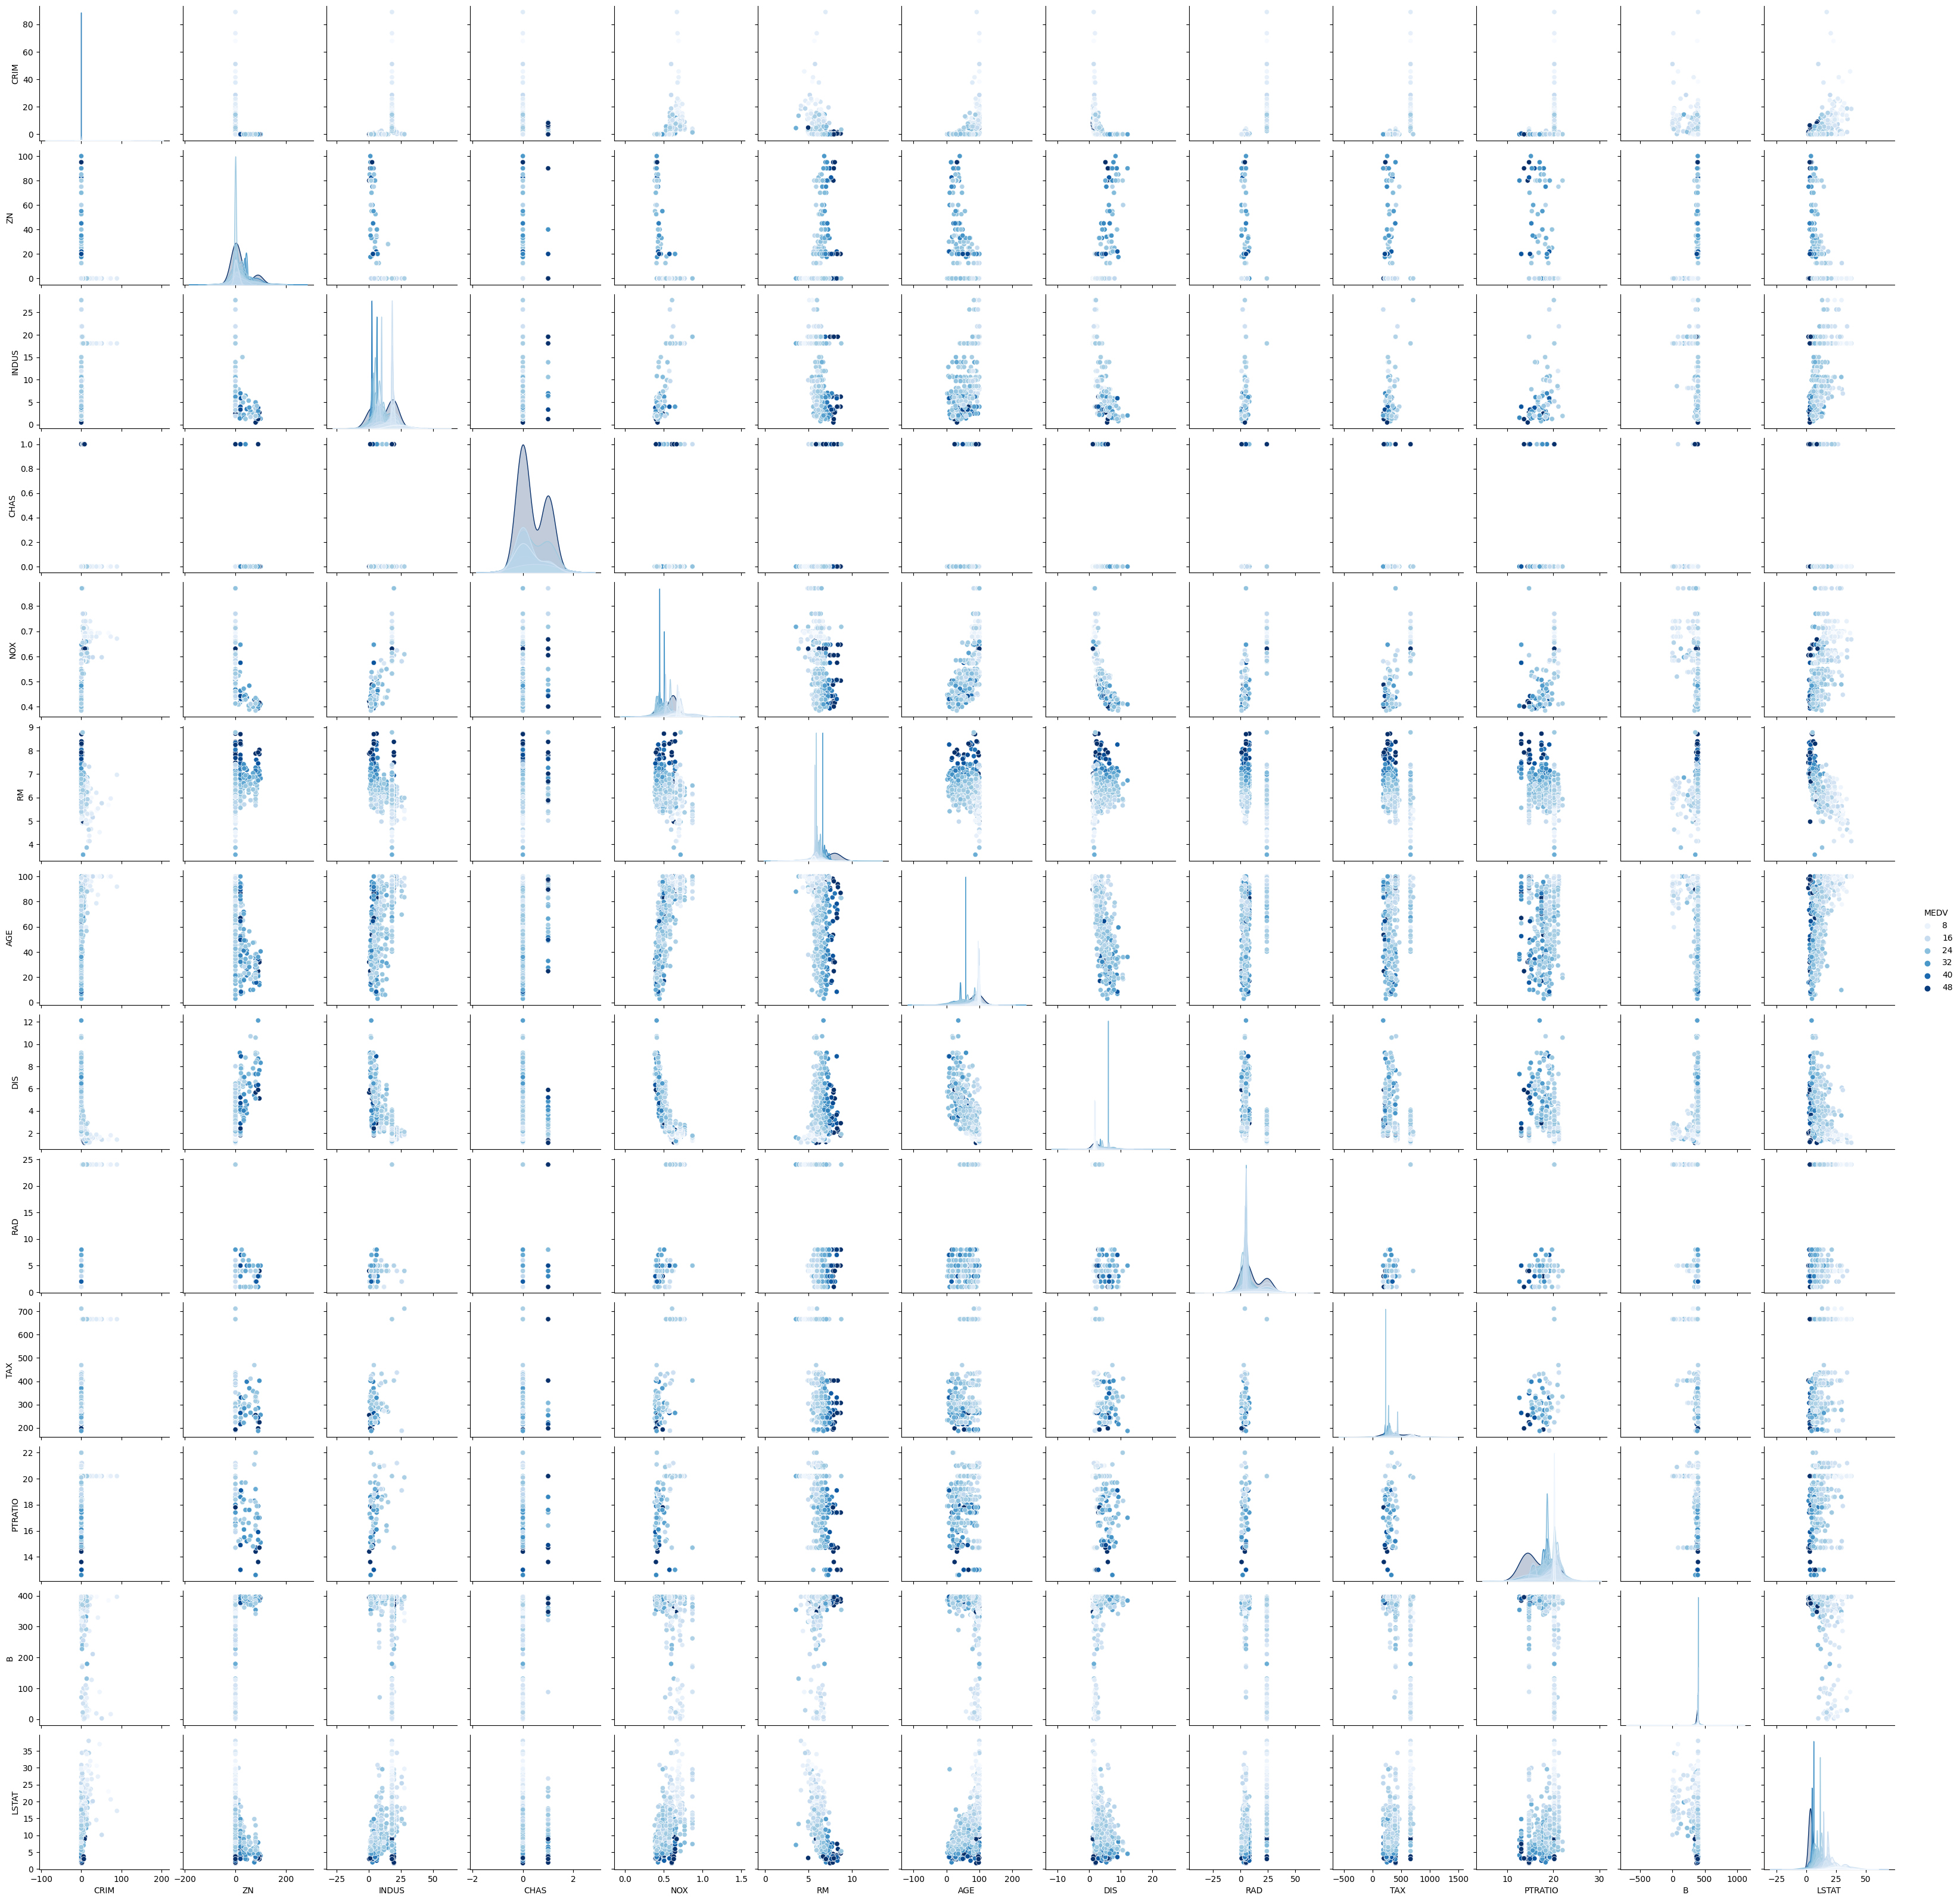

In [ ]:
sns.pairplot(boston,hue="MEDV",palette='Blues')

<Axes: >

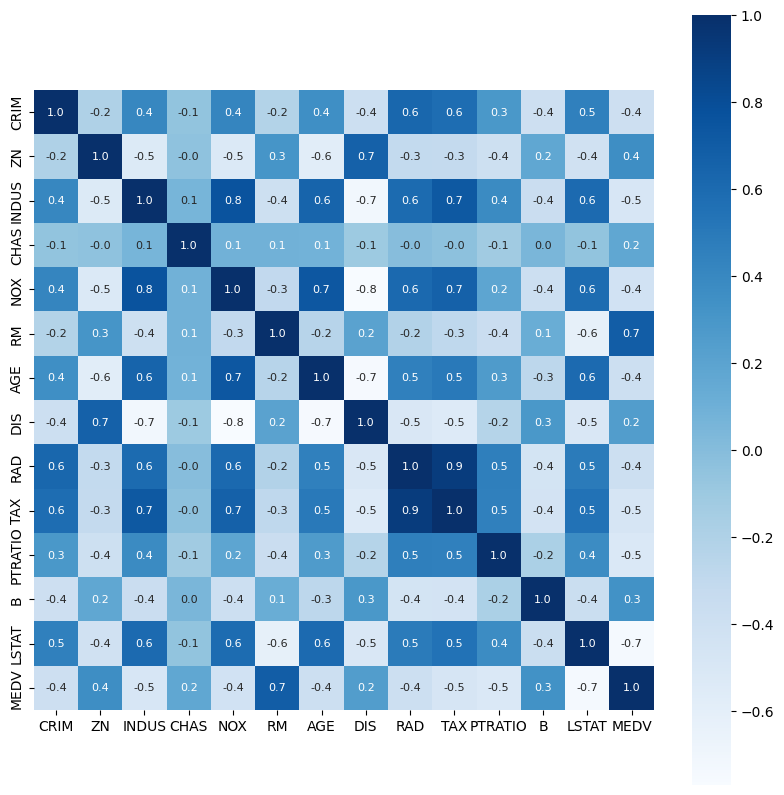

In [ ]:
corr_bos=boston.corr()
#Heat Map
# constructing a Heat Map
plt.figure(figsize=(10,10))
sns.heatmap(corr_bos,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

<ipython-input-15-e9710c589354>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston['MEDV'])


<Axes: xlabel='MEDV', ylabel='Density'>

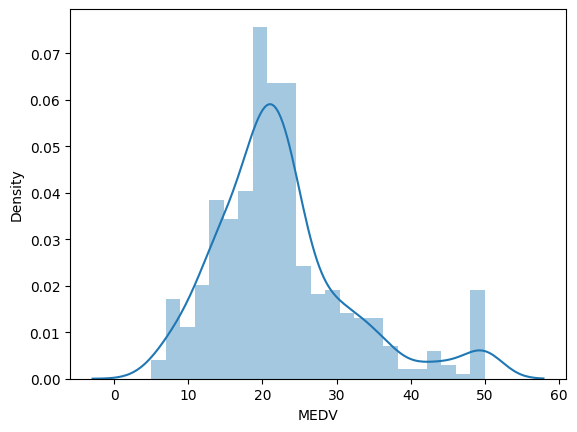

In [ ]:
sns.distplot(boston['MEDV'])

### **Splitting the data**

In [ ]:
X = boston.drop(columns=["MEDV"])
y = boston["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Initiate regression models

In [ ]:
# Initialize regression models

models = {

    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
}


In [ ]:
# Train and evaluate each model
results = {"Model": [], "MSE": [], "R2 Score": []}

In [ ]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results["Model"].append(model_name)
    results["MSE"].append(mse)
    results["R2 Score"].append(r2)

In [ ]:
# Create a DataFrame to compare the results
results_df = pd.DataFrame(results)

In [ ]:
# Print and visualize the results
print(results_df)

                           Model        MSE  R2 Score
0        Decision Tree Regressor  39.150000  0.519210
1        Random Forest Regressor  18.464425  0.773244
2    Gradient Boosting Regressor  17.845563  0.780844
3       Support Vector Regressor  78.478054  0.036233
4  K-Nearest Neighbors Regressor  51.743875  0.364548


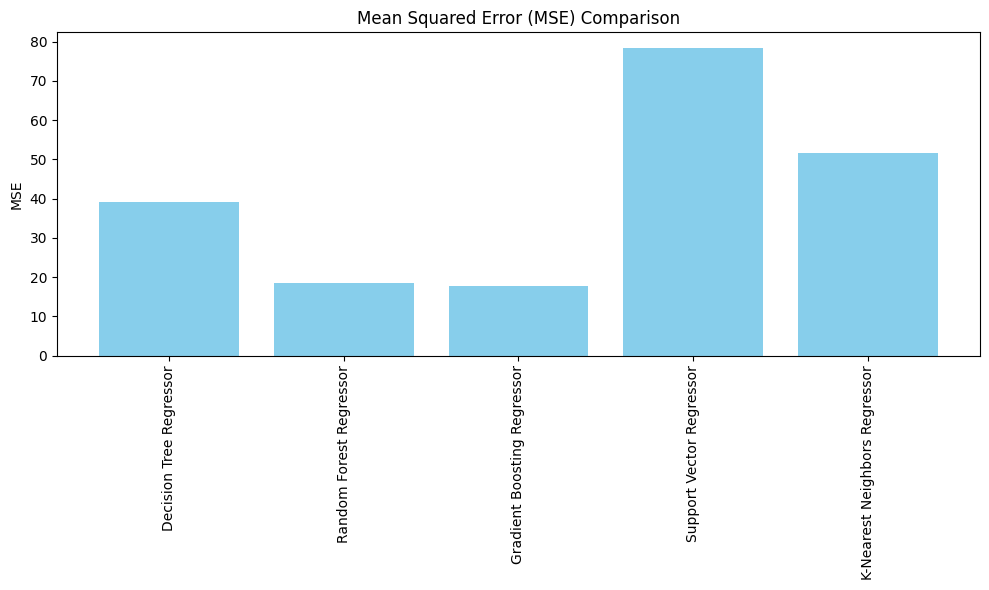

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["MSE"], color='skyblue')
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


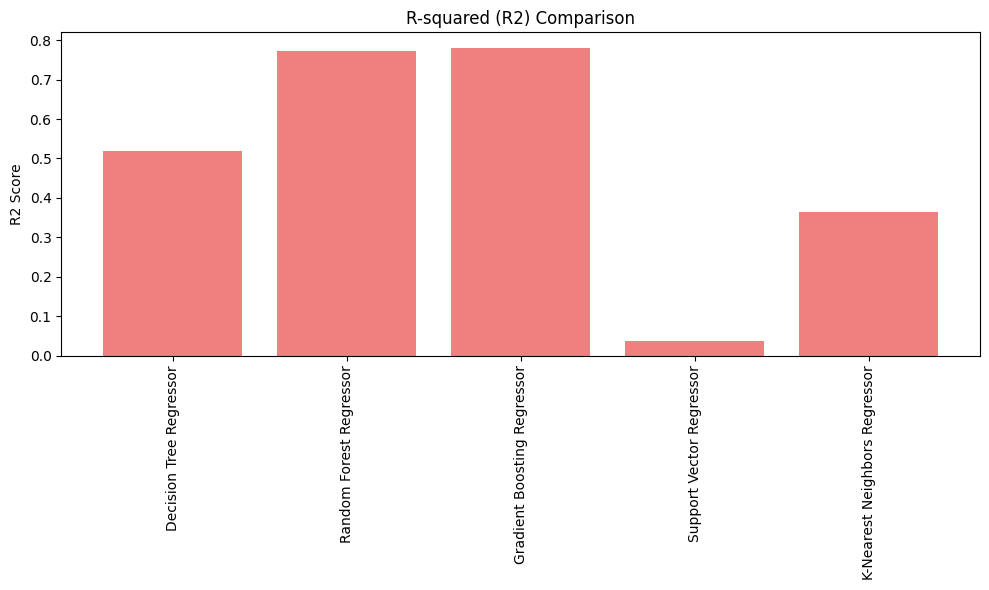

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["R2 Score"], color='lightcoral')
plt.title('R-squared (R2) Comparison')
plt.ylabel('R2 Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Gradient Boosting Regressor has the lowest MSE (16.82) and the highest R2 score (0.79). Therefore, it appears to be the best-performing model among the options you've evaluated. It provides a good balance of accuracy and generalization.

In [ ]:
# Select the best model (Random Forest Regressor in this case)
best_model = GradientBoostingRegressor()
best_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
#Feature importance
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
print("Feature Importance:")
for i in sorted_idx:
    print(f"{X.columns[i]}: {feature_importance[i]:.4f}")

Feature Importance:
LSTAT: 0.4702
RM: 0.3396
PTRATIO: 0.0526
DIS: 0.0525
NOX: 0.0275
CRIM: 0.0258
TAX: 0.0110
AGE: 0.0092
B: 0.0055
INDUS: 0.0034
RAD: 0.0016
CHAS: 0.0009
ZN: 0.0003


In [ ]:
import pickle

# Save the best model to a file using pickle
with open('boston_house_price_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)



In [ ]:

# Load the model from the pickle file
with open('boston_house_price_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [ ]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
input_data = {
    'CRIM': float(input("Enter feature1: ")),
    'ZN': float(input("Enter feature2: ")),
    'INDUS': float(input("Enter feature2: ")),
    'CHAS': float(input("Enter feature2: ")),
    'NOX': float(input("Enter feature2: ")),
    'RM': float(input("Enter feature2: ")),
    'AGE': float(input("Enter feature2: ")),
    'DIS': float(input("Enter feature2: ")),
    'RAD': float(input("Enter feature2: ")),
    'TAX': float(input("Enter feature2: ")),
    'PTRATIO': float(input("Enter feature2: ")),
    'B': float(input("Enter feature2: ")),
    'LSTAT': float(input("Enter feature2: "))

}

Enter feature1: 0.02729
Enter feature2: 0.0
Enter feature2: 7.07
Enter feature2: 0
Enter feature2: 0.469
Enter feature2: 7.185
Enter feature2: 61.1
Enter feature2: 4.9671
Enter feature2: 2
Enter feature2: 242.0
Enter feature2: 17.8
Enter feature2: 392.83
Enter feature2: 4.03


0.02729	0.0	7.07	0	0.469	7.185	61.1	4.9671	2	242.0	17.8	392.83	4.03

In [ ]:
user_data = pd.DataFrame([input_data])

In [ ]:
# Use the loaded model to make predictions on the user input data
predicted_price = loaded_model.predict(user_data)



In [ ]:
print("Predicted House Price:", predicted_price[0])

Predicted House Price: 34.401729399373956
